Image Enhancement

Install and Import Specified Libs
CV2 for Image ops
NUMPY
MATPLOTLIB
TKINTER for Opening file browser

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import tkinter as tk
from tkinter import filedialog

Opening File Browser

In [2]:
root = tk.Tk()
root.withdraw()
file_path = filedialog.askopenfilename()

Loding Image

In [3]:
img = cv.imread(file_path,0)

In [4]:
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
cv.imwrite('img2.tiff',cl1)

True

Image Segmentation

In [5]:
eimg = cv.imread('img2.tiff',0)
kernel = np.ones((5,5), np.uint8)
img_erosion = cv.erode(eimg, kernel, iterations=1)
img_dilation = cv.dilate(eimg, kernel, iterations=1)
opening = cv.morphologyEx(eimg, cv.MORPH_OPEN, kernel)
closing = cv.morphologyEx(eimg, cv.MORPH_CLOSE, kernel)
#cv.imshow('Input', img)
cv.imwrite('Erosion.tiff', img_erosion)
cv.imwrite('Dilation.tiff', img_dilation)
cv.imwrite('opening.tiff', opening)
cv.imwrite('closing.tiff', closing)

True

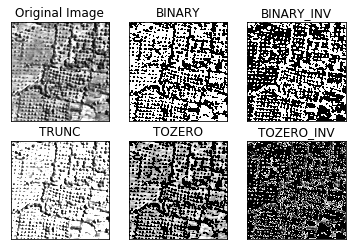

In [6]:
#thresholding
ret,thresh1 = cv.threshold(eimg,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(eimg,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(eimg,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(eimg,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(eimg,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

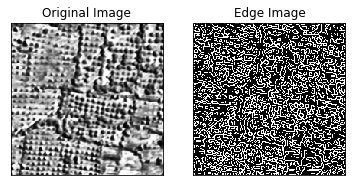

In [7]:
edges = cv.Canny(eimg,100,200)

plt.subplot(121),plt.imshow(eimg,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [8]:
flag, thresh = cv.threshold(eimg, 120, 255, cv.THRESH_BINARY)

# Find contours
eimg2, contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv.contourArea, reverse=True) 

# Select long perimeters only
perimeters = [cv.arcLength(contours[i],True) for i in range(len(contours))]
listindex=[i for i in range(15) if perimeters[i]>perimeters[0]/2]
numcards=len(listindex)

card_number = -1 #just so happened that this is the worst case
stencil = np.zeros(eimg.shape).astype(eimg.dtype)
cv.drawContours(stencil, [contours[listindex[card_number]]], 0, (255, 255, 255), cv.FILLED)
res = cv.bitwise_and(eimg, stencil)
cv.imwrite("out.tiff", res)
canny = cv.Canny(res, 100, 200)
cv.imwrite("canny.tiff", canny)

True

All the Images Displayed are generated along with dilation,erosion,closing and opening images 